In [26]:
#from google.colab import drive
#drive.mount('/content/drive/')
# DUE DATE = [02.06.2023]
# HOPE YOU ENJOYED THE RIDE
# GOOD LUCK!
#    |\---/|
#    | ,_, |
#     \_`_/-..----.
#  ___/ `   ' ,""+ \  
# (__...'   __\    |`.___.';
#   (_,...'(_,.`__)/'.....+

# Regression

Regression is a statistical analysis technique used to model the relationship between a dependent variable (also known as the response or target variable) and one or more independent variables (also known as predictors or features). The goal of regression analysis is to understand and predict the value of the dependent variable based on the values of the independent variables.


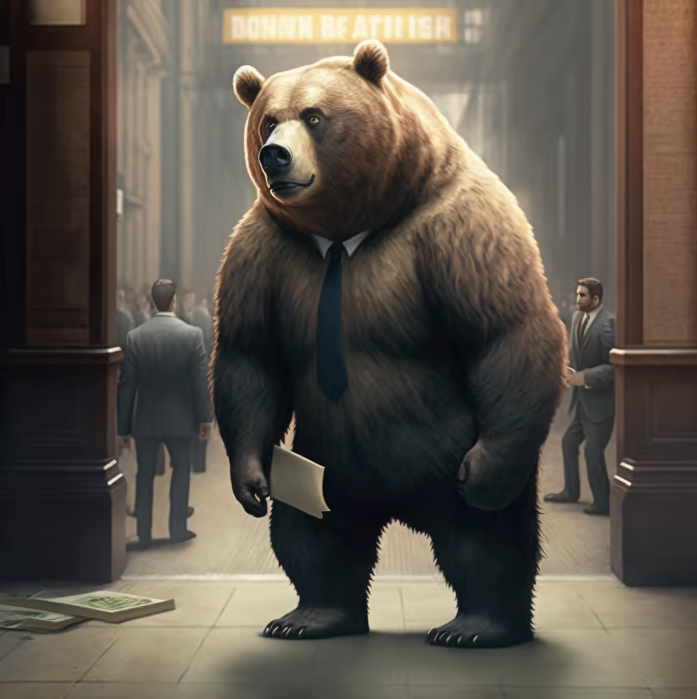
<br>
"Bear Stearns" by Midjourney

In this section, you are going to build a loan interest rate prediction model using regression.

## Data Preprocessing (9 pts)

There were apparently some researchers who were kidnapped during the survey by the Harkonnens which led to incomplete data.
** **
In this section, you are going to load the dataset and drop irrelevant column(s). 

Next, check for missing values and total number of duplicates. You will fill the missing values with the mode of the corresponding feature and print such features.



In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading the data
df = pd.read_csv('loans.csv',encoding='latin-1')
df.head()

#dropping the irrelevant column
to_drop = ['Unnamed: 0', 'ID']

df.drop(to_drop, inplace=True, axis=1)

#check each feature for missing values and handle them 
### WRITE YOUR CODE ###
df['Employment_Length'] = df['Employment_Length'].fillna(0)
df['Loan_Purpose'] = df['Loan_Purpose'].fillna('other')
df['Loan_Length'] = df['Loan_Length'].fillna(36)
print(df.isnull().sum().sum())
df.head()
df.info()

#checking num_duplicates
df.drop_duplicates()
### WRITE YOUR CODE ###

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2500 non-null   int64  
 1   Amount_Funded_By_Investors      2500 non-null   float64
 2   Interest_Rate                   2500 non-null   float64
 3   Loan_Length                     2500 non-null   float64
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2500 non-null   float64
 6   Home_Ownership                  2500 non-null   object 
 7   Monthly_Income                  2500 non-null   float64
 8   Open_CREDIT_Lines               2500 non-null   int64  
 9   Revolving_CREDIT_Balance        2500 non-null   int64  
 10  Inquiries_in_the_Last_6_Months  2500 non-null   int64  
 11  Employment_Length               2500 non-null   float64
dtypes: float64(6), int64(4), object(

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.00,0.09,36.0,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1.0
1,19200,19200.00,0.12,36.0,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2.0
2,35000,35000.00,0.22,60.0,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2.0
3,10000,9975.00,0.10,36.0,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5.0
4,12000,12000.00,0.12,36.0,credit_card,0.19,RENT,3195.00,11,14469,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000,29950.00,0.17,60.0,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8.0
2496,16000,16000.00,0.14,60.0,house,0.22,OWN,8903.25,18,18898,1,10.0
2497,10000,10000.00,0.14,36.0,debt_consolidation,0.05,MORTGAGE,2166.67,4,4544,0,10.0
2498,6000,6000.00,0.12,36.0,major_purchase,0.17,RENT,3500.00,8,1275,0,5.0


## Exploratory Data Analysis (18 pts)

Visualize the the interest rates corresponding to different Home_Ownership and Loan_Length parameters.
*   Create a new figure with a size of (10,5).
*   On a bar plot, represent the 'Home_Ownership' column in x-axis and the 'Interest_Rate' column in y-axis.
*   Hue would be according to the Loan_Length.
* Show the plot.



<AxesSubplot:xlabel='Home_Ownership', ylabel='Interest_Rate'>

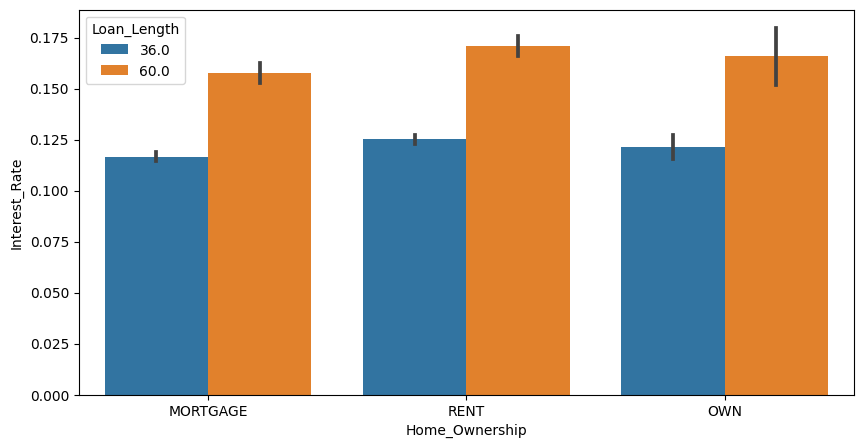

In [28]:
### WRITE YOUR CODE ###
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Home_Ownership',
            y = 'Interest_Rate',
            hue = 'Loan_Length',
            data = df)

Create a pie plot to demonstrate the share of distribution in home ownership.

([<matplotlib.patches.Wedge at 0x2706955eca0>,
 [Text(0.14060893825349835, 1.0909762263602374, 'MORTGAGE'),
  Text(-0.4151982163737613, -1.0186316513441194, 'RENT'),
  Text(1.0633486387760136, -0.28158421904147757, 'OWN')],
 [Text(0.07669578450190818, 0.5950779416510386, '45.9%\n(1148)'),
  Text(-0.22647175438568795, -0.5556172643695196, '45.8%\n(1146)'),
  Text(0.5800083484232801, -0.1535913922044423, '8.2%\n(206)')])

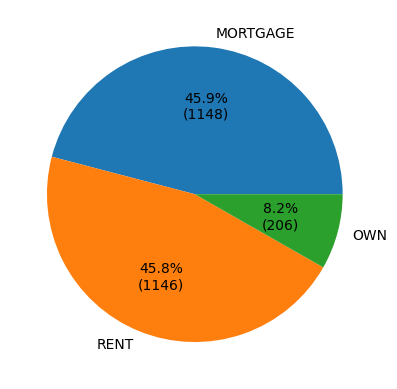

In [29]:
def find_percent(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

new_df = df['Home_Ownership'].value_counts()
plt.pie(new_df, labels = new_df.index, autopct=find_percent(new_df))

Check the data types for each feature and convert the categorical features into numerical values.

**Hint:** You can use the "get_dummies" function of Pandas library.

In [30]:
df.dtypes


Amount_Requested                    int64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance            int64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                 float64
dtype: object

In [31]:
### WRITE YOUR CODE ###
old = df
df = pd.get_dummies(df)
df['Amount_Requested'] = df['Amount_Requested'].astype('float')
df.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_Personal,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_other,Loan_Purpose_small_business,Home_Ownership_MORTGAGE,Home_Ownership_OWN,Home_Ownership_RENT
0,20000.0,20000.0,0.09,36.0,0.15,6541.67,14,14272,2,1.0,0,0,1,0,0,0,0,1,0,0
1,19200.0,19200.0,0.12,36.0,0.28,4583.33,12,11140,1,2.0,0,0,1,0,0,0,0,1,0,0
2,35000.0,35000.0,0.22,60.0,0.24,11500.00,14,21977,1,2.0,0,0,1,0,0,0,0,1,0,0
3,10000.0,9975.0,0.10,36.0,0.14,3833.33,10,9346,0,5.0,0,0,1,0,0,0,0,1,0,0
4,12000.0,12000.0,0.12,36.0,0.19,3195.00,11,14469,0,9.0,0,1,0,0,0,0,0,0,0,1


Create a heatmap to present the relationships between different features.

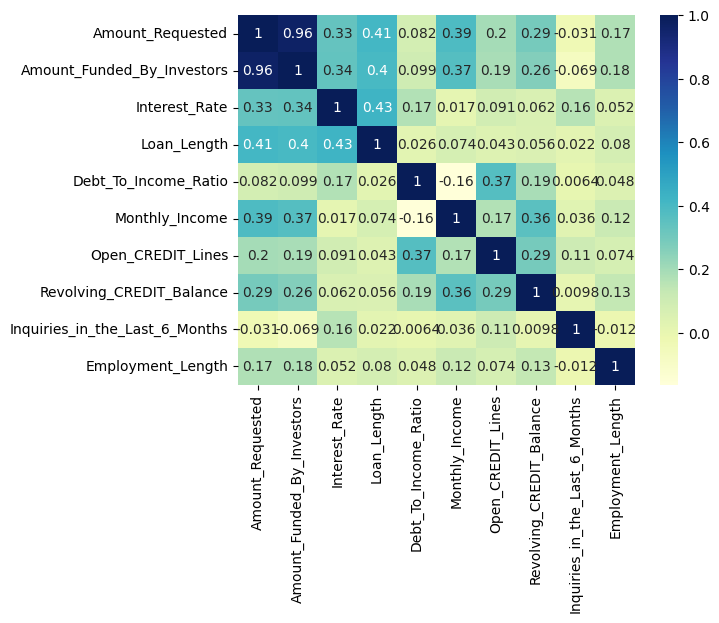

In [32]:
### WRITE YOUR CODE ###

# plotting correlation heatmap
#plt.figure(figsize=(15, 18))
dataplot = sns.heatmap(old.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
#plt.show()

## Model Evaluation (15 pts)

'Separate the data into features and labels.



In [33]:
#seperate the data into features and labels
### WRITE YOUR CODE ###
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

features_df = df.drop('Interest_Rate', axis=1)
label = df['Interest_Rate']

print(features_df.shape)
print(label.shape)



(2500, 19)
(2500,)


Split the data into training and test data. You could use a ratio of 80/20.

In [34]:
### WRITE YOUR CODE ###
X_train, X_test, y_train, y_test = train_test_split(features_df, label, test_size=0.2, random_state=42)

print("Train set size: %d\nTest set size: %d" % (len(y_train), len(y_test)))
X_train.head()

Train set size: 2000
Test set size: 500


,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_Personal,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_other,Loan_Purpose_small_business,Home_Ownership_MORTGAGE,Home_Ownership_OWN,Home_Ownership_RENT
2055,24575.0,24550.0,36.0,0.19,5166.67,8,23157,0,10.0,0,1,0,0,0,0,0,1,0,0
1961,20000.0,20000.0,36.0,0.19,6000.00,7,21202,2,10.0,0,0,1,0,0,0,0,0,0,1
1864,7200.0,7200.0,36.0,0.29,4166.67,12,5165,0,10.0,0,1,0,0,0,0,0,0,0,1
2326,7750.0,7750.0,36.0,0.09,2000.00,3,5399,0,5.0,0,1,0,0,0,0,0,1,0,0
461,1000.0,1000.0,36.0,0.31,1833.33,7,6283,0,3.0,0,0,1,0,0,0,0,0,0,1


Train a linear regression model on and report the MSE and R2 score on the training data.

In [35]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the training set
pred = regr.predict(X_train)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.6f" % mean_squared_error(y_train, pred))
# The coefficient of determination: 1 is a perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, pred))



Coefficients: 
 [ 2.08521908e-07  9.77704264e-07  1.42862677e-03  6.48938449e-02
 -4.31893599e-07 -1.17186929e-04 -2.43322636e-08  6.02708932e-03
  1.95170064e-04 -5.58984882e-03  6.11816968e-03  7.27870542e-03
 -9.38341286e-03 -8.52353475e-03  6.50380261e-03  3.59611872e-03
 -5.68284086e-03  4.63335716e-04  5.21950514e-03]
Mean squared error: 0.001183
Coefficient of determination: 0.30


Run the model on test data and report the MSE and R2 score.

In [36]:
# Predict the target variable on the test data
pred_test = regr.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R2 score on the test data
print("Mean squared error: %.6f" % mean_squared_error(y_test, pred_test))
# The coefficient of determination: 1 is a perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, pred_test))



Mean squared error: 0.001264
Coefficient of determination: 0.28


# Experiment with Different Regression Models (8 pts)

Experiment with at least one alternative regression model.

Report the results in comparison with those of the linear regressor.

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train)
poly_features_test= poly.fit_transform(X_test)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
y_predicted_test = poly_reg_model.predict(poly_features_test)

print("LINEAR: \n")
# The mean squared error
print("Mean squared error: %.6f" % mean_squared_error(y_test, pred_test))
# The coefficient of determination: 1 is a perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, pred_test))

print("\nPOLYNOMIAL: \n")
# The mean squared error
print("Mean squared error: %.6f" % mean_squared_error(y_test, y_predicted_test))
# The coefficient of determination: 1 is a perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predicted_test))


# res = df.head(2000)
# res['Interest_Rate'] = label.head(2000)
# res['Predicted'] = y_predicted_test
# res.head(50)


LINEAR: 

Mean squared error: 0.001264
Coefficient of determination: 0.28

POLYNOMIAL: 

Mean squared error: 0.001534
Coefficient of determination: 0.13


# Classification

Classification is a fundamental task in machine learning that is often used in conjunction with regression. The goal of a classification task is to train a machine learning algorithm to accurately assign a given set of features to the correct class. There are various types of classification tasks, such as image classification, text classification, and audio classification etc.

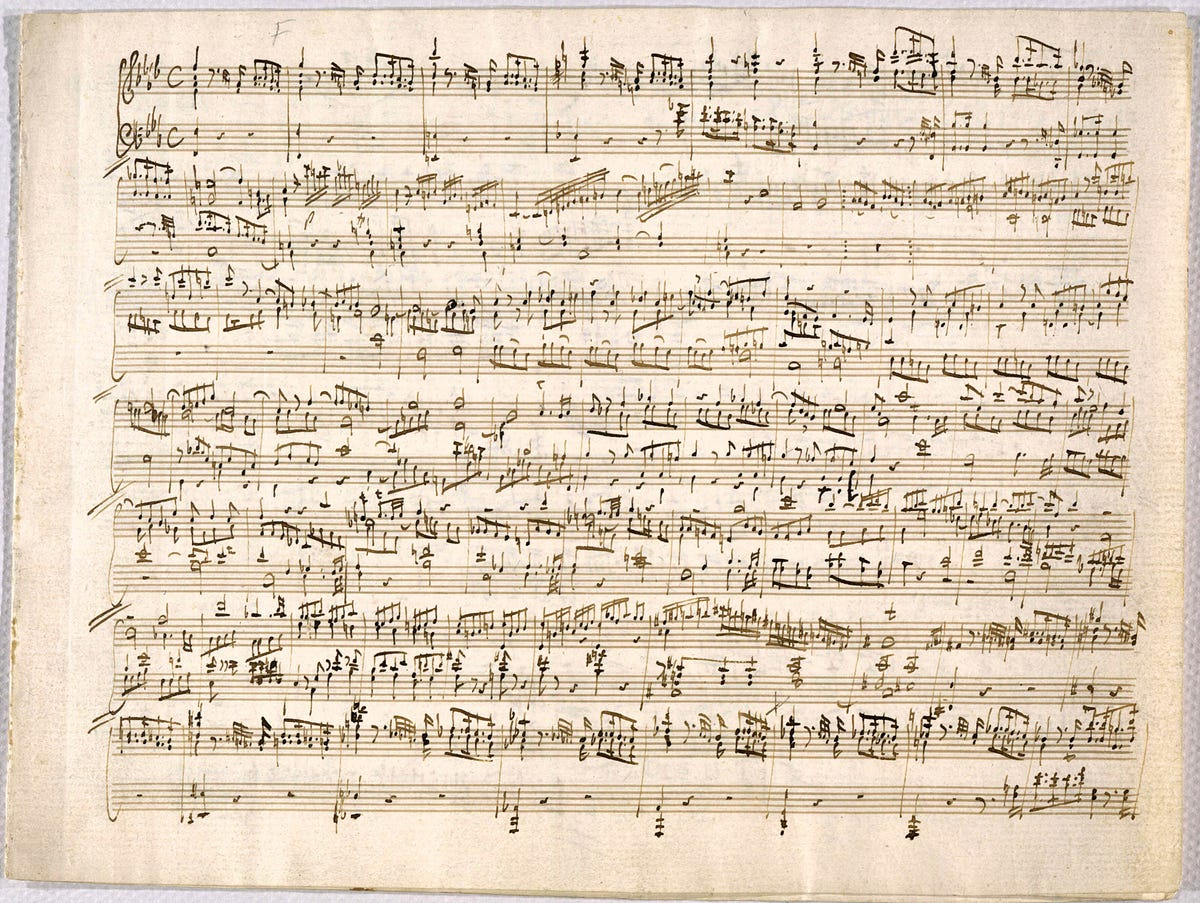

In this section, we are going to build and train a model which can figure out the composer from the notes and velocities that are in the song. These values are stored inside midi files. 

In [38]:
import pretty_midi
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Do not delete this function. We will use this function to extract the values we have talked before.

In [39]:
def extractNotesAndVelocities(path):
    # Reading the midi file
    midi_data = pretty_midi.PrettyMIDI(path)
    
    notes = np.array([])
    velocities = np.array([])

    # Extracting pitch and velocity values of each song 
    for instrument in midi_data.instruments:
      notes = np.append(notes, np.array([note.pitch for note in instrument.notes]))
      velocities = np.append(velocities, np.array([note.velocity for note in instrument.notes]))

    return notes, velocities

## Data Loading (10 pts)

Read the MIDI files in all the folders in the given root directory and store them in a dictionary. There are some corrupted files inside the folders so don't forget to write a code to bypass that. You can use the extractNotesAndVelocities function above to extract the needed values. (10 pts)

In [40]:
import os

def createComposersDictionary(root_path):

  composers = {}

  for composer in os.listdir(root_path):
      
      curr = os.path.normpath(os.path.join(root_path, composer))

      if os.path.isdir(curr):
        
          if composer not in composers.keys():
            composers[composer] = []

            for file in os.listdir(curr):
              curr_f = os.path.normpath(os.path.join(curr, file))

              if os.path.isfile(curr_f):
                try:
                  notes, velocities = extractNotesAndVelocities(curr_f)
                  composers[composer].append(pd.DataFrame({'Notes': notes, 'Velocities': velocities}))
                except Exception as e:
                  print(f"Error detected processing file '{curr_f}': {str(e)}")

  return composers


path = os.path.normpath("C:/Users/tansy/hw3/musicnet_midis")
composers = createComposersDictionary(path)


c:\Users\Тансылу\AppData\Local\Programs\Python\Python39\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Tansylu processing file 'C:\Users\tansy\hw3\musicnet_midis\Bach\2194_prelude13.mid': data byte must be in range 0..127
Tansylu processing file 'C:\Users\tansy\hw3\musicnet_midis\Bach\2211_fugue12.mid': no MTrk header at start of track
Tansylu processing file 'C:\Users\tansy\hw3\musicnet_midis\Bach\2227_fugue6.mid': data byte must be in range 0..127
Tansylu processing file 'C:\Users\tansy\hw3\musicnet_midis\Bach\2230_prelude20.mid': data byte must be in range 0..127
Tansylu processing file 'C:\Users\tansy\hw3\musicnet_midis\Bach\2292_prelude19.mid': 
Tansylu processing file 'C:\Users\tansy\hw3\musicnet_midis\Bach\2305_prelude14.mid': no MTrk header at start of track
Tansylu processing file 'C:\Users\tansy\hw3\musicnet_midis\Bach\2310_prelude15.mid': data byte must be in range 0..127


## Mapping Name to Index (5 pts)

Since the machine learning solutions only understand numeric values we need to create a mapping from names of the composers to numbers.(5 pts)

In [41]:
numbers = [i for i in range(0,(len(composers.keys())))]
print(numbers)
composer_name_to_index = dict(zip(composers.keys(), numbers))

[0, 1, 2, 3]


In [42]:
composer_name_to_index

{'Bach': 0, 'Beethoven': 1, 'Mozart': 2, 'Schubert': 3}

## Data Preprocessing (10 pts)

The machine learning algorithms work by using fixed sized inputs and outputs and songs have different numbers of notes, therefore we need to put them inside a fixed sized of vectors. Fixed size will be 400!!!

Scikit-learn only has shallow machine learning algorithms, thus you can use flatten() function to convert the numpy array of notes and velocities to 1d vector.



In [43]:
fixed_size = 400 # Fixed size of features

labels = [] # Store the labels in this list
features = [] # Store the features as 2d(number of elements, fixed size) arrays in this list
notes = [] # Store the average pitch of each fixed sized array in this list for visualization
velocities = [] # Store the average velocity if each fixed sized array in this list for visualization

for composer, notes_and_velocities in composers.items():
  for i in range(len(notes_and_velocities)):

    ### WRITE YOUR CODE ###
    if len(notes_and_velocities[i]) >= 400:
    # Bypass the songs with less than 400 notes

    # Extract then store the !!average!! notes and velocities of each 400 fixed sized vectors
      avg_notes = np.mean(notes_and_velocities[i]['Notes'][:fixed_size])
    
      avg_velocities = np.mean(notes_and_velocities[i]['Velocities'][:fixed_size])
      notes.append(avg_notes)
      velocities.append(avg_velocities)
    # Extract then store the composer names of each 400 sized vectors
      name = composer
      labels.append(composer_name_to_index[name])
    # Extract then store the features(notes and velocities) of each 400 sized vectors
    # do not forget to flatten the array before storing
      s = np.concatenate((notes_and_velocities[i]['Notes'][:fixed_size], notes_and_velocities[i]['Velocities'][:fixed_size])).flatten()
      features.append(s)
     
    ########################

labels = np.array(labels)
features = np.array(features)
print(features.shape)
notes = np.array(notes)
velocities = np.array(velocities)

(270, 800)


# Data Visualization (6 pts)

Visualize the average velocity and pitch of each song(400 fixed size vector) with the composers as colors.


1.   Create figure with 16, 12 figsize
2.   Plot scatter plot using notes and velocities with labels as color
3.   Write xlabel as Notes
4.   Write ylabel as Velocities
5.   Write title as Notes vs Velocities with Labels
6.   Put colorbar
7.   Show the plot

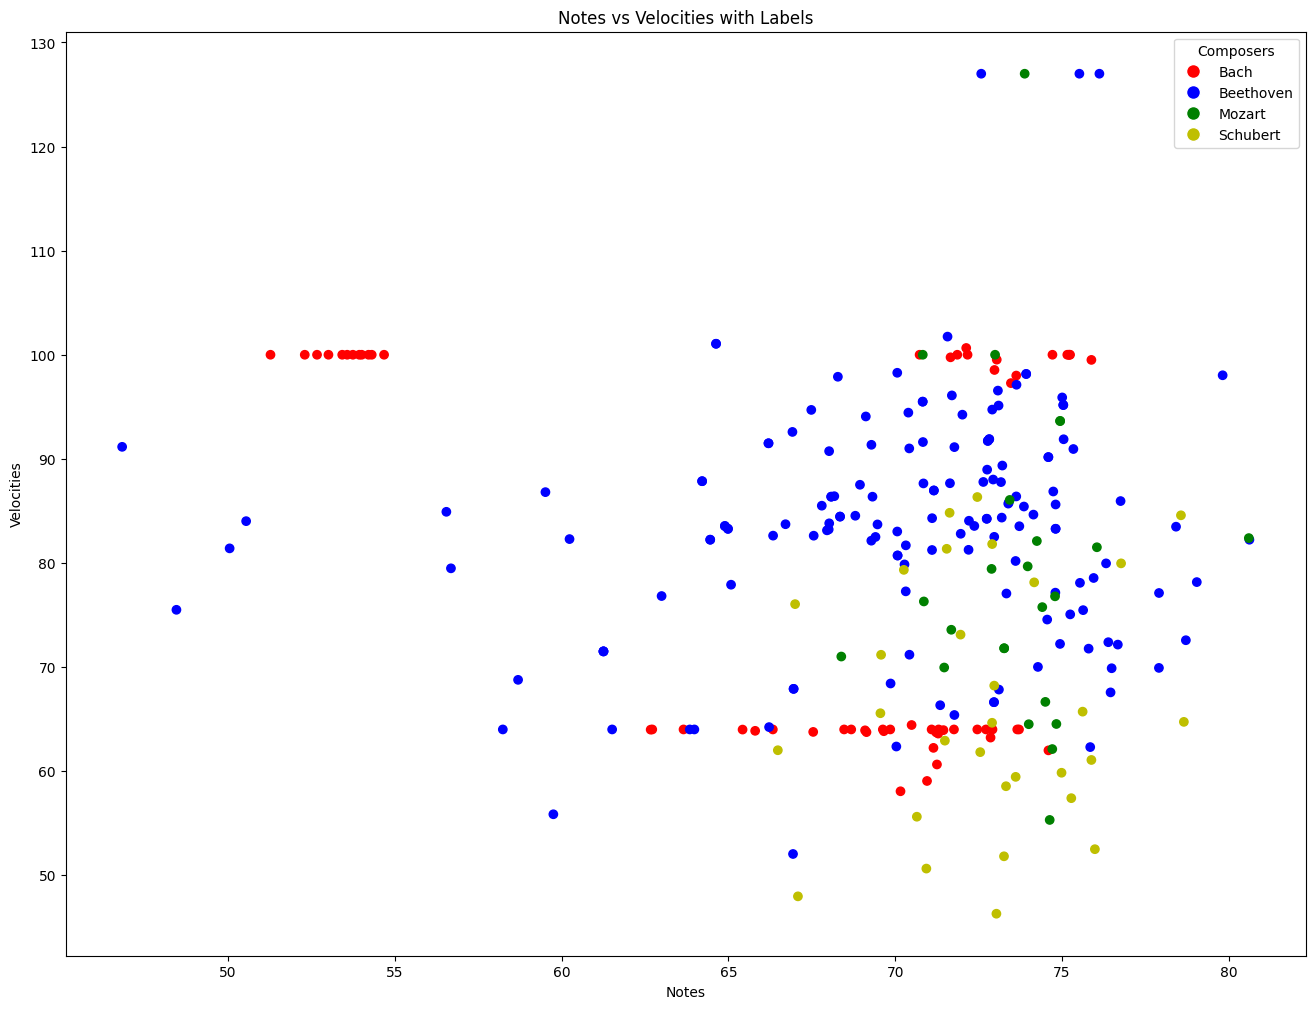

In [44]:
import matplotlib.pyplot as plt
import numpy as np

colormap = np.array(['r', 'b', 'g', 'y'])

plt.figure(figsize=(16, 12))
plt.scatter(notes, velocities, c=colormap[labels])

plt.xlabel('Notes')
plt.ylabel('Velocities')
plt.title('Notes vs Velocities with Labels')

# Create a colorbar legend with composer names
composer_names = composers
composer_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colormap]
plt.legend(composer_legend, composer_names, title='Composers')

plt.show()


## Checking lengths (2 pts)

Check whether the lengths of features and labels are the same or not.(2pts)

In [45]:
### WRITE YOUR CODE ###
print(features.shape)
print(labels.shape)

(270, 800)
(270,)


## Train-test split (2 pts)

Split the features and labels into train and test datasets using sklearn with test size of 0.2(2 pts)

In [46]:

Music_X_train, Music_X_test, Music_y_train, Music_y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(Music_X_train.shape)
print(Music_y_train.shape)

(216, 800)
(216,)


## Choosing and training a model (10 pts)

Choose a classification model and explain why it is the better choice.(8 pts)

Train the model(2pts)

In [47]:
### WRITE YOUR CODE ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

forest = RandomForestClassifier(n_estimators=100, max_depth= 5)

forest.fit(Music_X_train, Music_y_train)
print(forest.score(Music_X_test, Music_y_test))

# Random Forest better perceives complex patterns in classical music from the MIDI files
# Additionally, it deals with noise and outliers in the data
# Feature importance measures help in determining most important musical features
# More accurate overall


0.8703703703703703


## Model Evaluation (5 pts)

Predict on test features and use f1_score to evaluate your model.(5pts)

In [52]:
### WRITE YOUR CODE ###
from sklearn.metrics import f1_score
notes_test = Music_X_test[:, 0]
velocities_test = Music_X_test[:, 1]

Music_pred = forest.predict(Music_X_test)
f1_micro = f1_score(Music_y_test, Music_pred, average='micro')

print("F1 score (micro):", f1_micro)


F1 score (micro): 0.8703703703703703
